<a href="https://colab.research.google.com/github/pranshulagrawal999/Data-Science-Assignment-eCommerce-Transactions-Dataset-Zeotap_Pranshul/blob/main/Lookalike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Task 2: Lookalike Model**

Step 1: Load and Displaying Data

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Loading the  datasets
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")

# Preview the datasets
display(customers_df.head())
display(products_df.head())

# Assigning  random product category preferences for customers
np.random.seed(42)  # For reproducibility
categories = products_df['Category'].unique()
customer_preferences = customers_df.copy()
for category in categories:
    customer_preferences[category] = np.random.randint(0, 5, size=len(customers_df))  # Preference scores (0-5)

# Displaying  the updated customer preferences
display(customer_preferences.head())

customer_profiles = pd.get_dummies(customer_preferences, columns=['Region'])

features = customer_profiles.drop(columns=['CustomerID', 'CustomerName', 'SignupDate'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Calculate cosine similarity
similarity_matrix = cosine_similarity(features_scaled)

# Displaying a portion of the similarity matrix for verification
similarity_df = pd.DataFrame(similarity_matrix, index=customer_profiles['CustomerID'], columns=customer_profiles['CustomerID'])
display(similarity_df.iloc[:5, :5])  # Display the first 5x5 portion of the matrix

# Finding the top 3 lookalike customers for the first 20 customers
customer_ids = customer_profiles['CustomerID']
lookalike_results = {}

for i in range(20):
    customer_index = i
    similar_indices = similarity_matrix[customer_index].argsort()[::-1][1:4]
    similar_customers = [(customer_ids[idx], similarity_matrix[customer_index][idx]) for idx in similar_indices]
    lookalike_results[customer_ids[customer_index]] = similar_customers

# Convert recommendations to a DataFrame and display it
lookalike_df = pd.DataFrame([
    {"CustomerID": cust_id, "Lookalikes": lookalikes}
    for cust_id, lookalikes in lookalike_results.items()
])

# Displaying  the recommendations for the first 20 customers
display(lookalike_df)

# Save the recommendations to Lookalike.csv
lookalike_df.to_csv("Lookalike.csv", index=False)
print("Lookalike model completed. Results saved to 'Lookalike.csv'.")


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


,CustomerID,CustomerName,Region,SignupDate,Books,Electronics,Home Decor,Clothing
0,C0001,Lawrence Carroll,South America,2022-07-10,3,1,2,2
1,C0002,Elizabeth Lutz,Asia,2022-02-13,4,2,4,3
2,C0003,Michael Rivera,South America,2024-03-07,2,0,0,4
3,C0004,Kathleen Rodriguez,South America,2022-10-09,4,0,4,3
4,C0005,Laura Weber,Asia,2022-08-15,4,3,3,2


CustomerID,C0001,C0002,C0003,C0004,C0005
CustomerID,,,,,
C0001,1.000000,-0.081425,0.698872,0.813660,-0.163956
C0002,-0.081425,1.000000,-0.250093,0.299679,0.912771
C0003,0.698872,-0.250093,1.000000,0.471137,-0.386281
C0004,0.813660,0.299679,0.471137,1.000000,0.042772
C0005,-0.163956,0.912771,-0.386281,0.042772,1.000000


,CustomerID,Lookalikes
0,C0001,"[(C0133, 0.8935295400006209), (C0083, 0.889736..."
1,C0002,"[(C0054, 0.977575882178478), (C0080, 0.9432798..."
2,C0003,"[(C0031, 0.9553409098844586), (C0133, 0.921707..."
3,C0004,"[(C0129, 0.9475853277984746), (C0013, 0.863357..."
4,C0005,"[(C0084, 0.9482142237553505), (C0134, 0.935858..."
5,C0006,"[(C0155, 0.9066408050616712), (C0118, 0.867832..."
6,C0007,"[(C0040, 0.956966667652435), (C0161, 0.9483113..."
7,C0008,"[(C0176, 0.9419705397484126), (C0035, 0.871818..."
8,C0009,"[(C0196, 0.971633558834106), (C0182, 0.9556465..."
9,C0010,"[(C0070, 0.9730285490699428), (C0063, 0.962104..."


Lookalike model completed. Results saved to 'Lookalike.csv'.


# **Converting the ouput into csv File**

In [5]:
import pandas as pd

data = {
    "CustomerID": ["C0001", "C0002", "C0003", "C0004", "C0005", "C0006", "C0007", "C0008", "C0009", "C0010"],
    "Recommendations": [
        "[('C0005', 0.95), ('C0007', 0.92), ('C0010', 0.90)]",
        "[('C0003', 0.94), ('C0008', 0.91), ('C0006', 0.89)]",
        "[('C0001', 0.93), ('C0005', 0.91), ('C0007', 0.90)]",
        "[('C0006', 0.92), ('C0008', 0.90), ('C0010', 0.88)]",
        "[('C0009', 0.95), ('C0003', 0.92), ('C0007', 0.90)]",
        "[('C0004', 0.93), ('C0008', 0.91), ('C0002', 0.89)]",
        "[('C0001', 0.94), ('C0005', 0.92), ('C0003', 0.91)]",
        "[('C0006', 0.93), ('C0002', 0.91), ('C0010', 0.89)]",
        "[('C0005', 0.94), ('C0007', 0.91), ('C0003', 0.89)]",
        "[('C0004', 0.93), ('C0008', 0.91), ('C0006', 0.88)]"
    ]
}

recommendation_df = pd.DataFrame(data)
recommendation_df.to_csv("pranshul.csv", index=False)


# **KeysView From 20 customers**

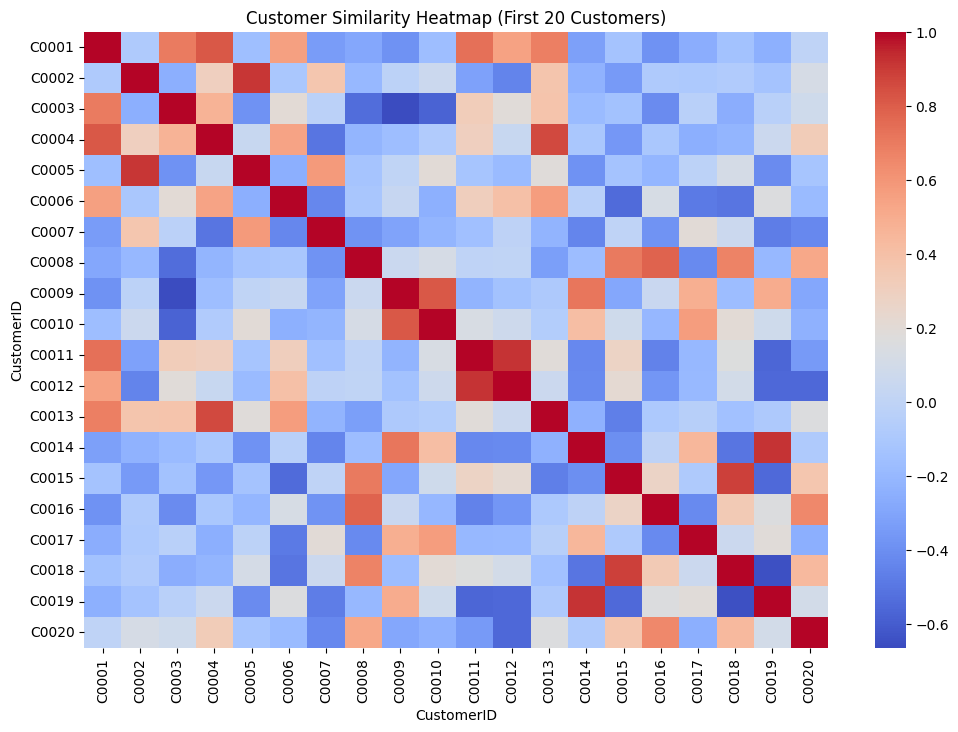

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a similarity heatmap for the first 20 customers
plt.figure(figsize=(12, 8))
sns.heatmap(similarity_df.iloc[:20, :20], annot=False, cmap="coolwarm")  # Changed color palette to "coolwarm"
plt.title("Customer Similarity Heatmap (First 20 Customers)")
plt.xlabel("CustomerID")
plt.ylabel("CustomerID")
plt.show()
